<a href="https://colab.research.google.com/github/opi-lab/optical-metrology-2021/blob/gh-pages/notebooks/sl_laser_spot_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laser triangulation

Andres Marrugo, PhD      
Universidad Tecnológica de Bolívar

In this activity, we will work with a laser spot triangulation system for 3D reconstruction. 

The figure shows the optical system used in the simulation. It corresponds to a non-telecentric laser triangulation system both in observation and projection.

![laser spot triangulation](https://github.com/opi-lab/optical-metrology-2021/raw/gh-pages/figures/laser-spot-triangulation.png)

## Projection Data:
The laser deflector alters the angle of the beam. The indicated position corresponds to a value positive of $θ$, a negative value will place the ray below the projection axis. 

$d$ = 500 mm     
$l$ = 500 mm    

## Observation Data
The simulated CCD has 256x256 pixels, with a sensor size of 8 mm. The focal is adjusted to 50 mm and a field of observation on the reference plane of 72 mm is obtained. The axis of the observation system is located at pixel 128. The laser beam sweeps the entire observation field and the entire sensor. The arrows on the coordinate systems define the positive directions. On the sensor, the $X_c$ axis defines the direction of pixel increment.

The sweep of the body is performed by changing $θ$ between a negative value to a positive value to sweep the $X$ axis. After sweeping the $X$ axis, the laser returns to the initial position and moves in $Y$ an interval of 0.28 mm, to begin another sweep in $Y$. For each position an image is taken and stored in jpg format. Images occupy 256x256 pixels stored at 8 bits. (They are read with ``im = cv2.imread('name.jpg', 0)``). A speckle pattern was added to each image as it is always present in laser illumination. 

For each position of the laser, the image was taken on the reference plane. Thus there are two images for each laser position, one on the object (the file name begins with Obj) and the other on the reference plane (the file name begins with PR). Additionally, the name has two numbers: the first corresponds to the $Y$ sweep and the second to the $X$ sweep. Thus, Obj_16_3 corresponds to 16 displacements in Y of 0.28 mm each and 3 variations along $X$.

## ANALYSIS

The objective is to do a complete reconstruction of the simulated body. Therefore, each image (both of the object and the reference plane) must be read and the position of the maximum intensity (Center of the laser point) in pixels must be found. Position 128 corresponds to the center of the coordinate system in mm ($X_c$). The $X$ coordinates can be found with a conversion factor $Kx$ obtained from the field of observation size. Knowing the geometry of the system and the basic equations of laser triangulation, the $Z$ coordinates are obtained for each image of the laser point. The $Y$ coordinate is also known because it depends on the scan interval.

## Solution

In [ ]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import glob
import cv2

In [ ]:
# We download the images
!wget https://github.com/opi-lab/optical-metrology-2021/raw/gh-pages/data/data_triang_laser.zip


--2021-10-15 14:57:27--  https://github.com/opi-lab/optical-metrology-2021/raw/gh-pages/data/data_triang_laser.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opi-lab/optical-metrology-2021/gh-pages/data/data_triang_laser.zip [following]
--2021-10-15 14:57:27--  https://raw.githubusercontent.com/opi-lab/optical-metrology-2021/gh-pages/data/data_triang_laser.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43584552 (42M) [application/zip]
Saving to: ‘data_triang_laser.zip’

data_triang_laser.z 100%[===================>]  41.57M   162MB/s    in 0.3s    

2021-10-15 14:57:28 (162 MB/s) - ‘da

In [ ]:
# unzip the images
!unzip /content/data_triang_laser.zip

Streaming output truncated to the last 5000 lines.
  inflating: Obj_16_49.jpg           
  inflating: Obj_16_5.jpg            
  inflating: Obj_16_50.jpg           
  inflating: Obj_16_51.jpg           
  inflating: Obj_16_6.jpg            
  inflating: Obj_16_7.jpg            
  inflating: Obj_16_8.jpg            
  inflating: Obj_16_9.jpg            
  inflating: Obj_17_0.jpg            
  inflating: Obj_17_1.jpg            
  inflating: Obj_17_10.jpg           
  inflating: Obj_17_11.jpg           
  inflating: Obj_17_12.jpg           
  inflating: Obj_17_13.jpg           
  inflating: Obj_17_14.jpg           
  inflating: Obj_17_15.jpg           
  inflating: Obj_17_16.jpg           
  inflating: Obj_17_17.jpg           
  inflating: Obj_17_18.jpg           
  inflating: Obj_17_19.jpg           
  inflating: Obj_17_2.jpg            
  inflating: Obj_17_20.jpg           
  inflating: Obj_17_21.jpg           
  inflating: Obj_17_22.jpg           
  inflating: Obj_17_23.jpg           

In [ ]:
# Let's load several images

obj_list = sorted(glob.glob('Obj*'))
pr_list = sorted(glob.glob('PR*'))

There are 2704 images


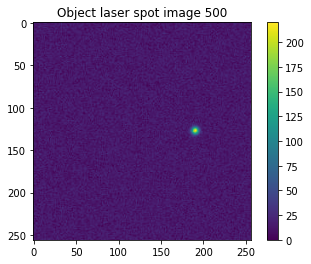

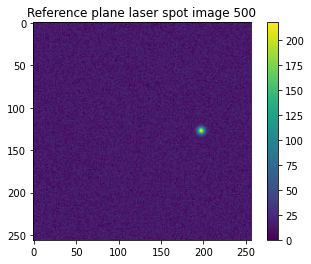

In [ ]:
N = len(obj_list)
print('There are {} images'.format(N))

idx = 500
im1 = cv2.imread(obj_list[idx], 0)
im2 = cv2.imread(pr_list[idx], 0)
plt.imshow(im1)
plt.title('Object laser spot image {}'.format(idx))
plt.colorbar()
plt.show()
plt.imshow(im2)
plt.title('Reference plane laser spot image {}'.format(idx))
plt.colorbar()
plt.show()

In [1]:
# TODO
# Use the Partially Linear Model for Flat Surface Measurement to establish 
# the 3D reconstruction equations.

# Write a FOR loop for reading all the images.
# Find a way to determine the maximum or centroid of each laser spot image.
# Obtain scale convestion factor Kx and Ky
# Obtain the height or z.
# Plot the surface as an image or as a surface plot.

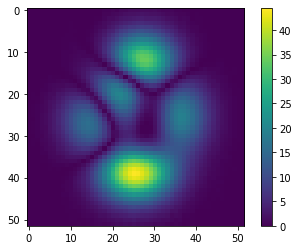

In [ ]:
plt.imshow(delta_z)
plt.colorbar()
plt.show()

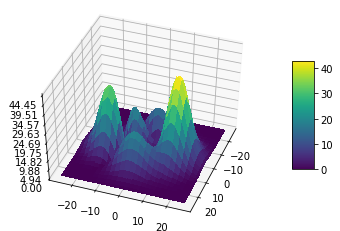

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
# import numpy as np

w, h = delta.shape

X = np.linspace(-w/2, w/2, w)
Y = np.linspace(-h/2, h/2, h)
X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


# Plot the surface.
surf = ax.plot_surface(X, Y, delta, cmap=cm.viridis,
                       linewidth=0, antialiased=False)

ax.view_init(45, 20) # Point of view for a better visualization

# Customize the z axis.
# ax.set_zlim(0, 25)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()